In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

from astropy import table
from astropy.table import Table
from astropy.io import ascii
from tabulate import tabulate
import pyspherematch as sm

from astropy import units as u
from astropy.coordinates import SkyCoord, FK4, FK5

SAGA_DIR = os.environ['SAGA_DIR']
SAGA_DROPBOX= os.environ['SAGA_DROPBOX']

#import pandas as pd
from scipy.stats import spearmanr


In [14]:
from palettable.colorbrewer.qualitative import Dark2_8
if 'plt' in locals() and hasattr(plt, 'rcParams'):
    plt.rcParams['lines.linewidth'] = 2.5
    plt.rcParams['font.size'] = 16.0
    plt.rcParams['font.weight'] = 'medium'
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=Dark2_8.mpl_colors)
    plt.rcParams['legend.fontsize'] = 'medium'
    plt.rcParams['legend.frameon'] = False
    plt.rcParams['figure.dpi'] = 100
    plt.rcParams['figure.figsize'] = 7, 6
    plt.rcParams['xtick.major.size'] = 6
    plt.rcParams['xtick.minor.size'] = 4
    plt.rcParams['ytick.major.size'] = 6
    plt.rcParams['ytick.minor.size'] = 4

In [15]:
# READ SUBMASTER LIST 
master = Table.read(SAGA_DROPBOX+'hosts/submaster.ecsv.gz', format='ascii.ecsv')

In [16]:
file = SAGA_DIR + '/data/sats.txt'
sats = ascii.read(file)

hid = np.in1d(master['NSAID'],sats['NSAID'])
hosts = master[hid]
for obj in hosts:
    print obj['NSAID']

33446
61945
132339
147100
149781
150887
165536
166313


In [17]:
nsa = Table.read (SAGA_DIR+'/cats/nsa_v0_1_3.fits')
nids = np.in1d(nsa['NSAID'],sats['NSAID'])
mass = nsa['MASS'][nids]
log_SM = np.log10(mass/0.7**2)



0.101733037454
0.385120643556
(-0.11904761904761905, 0.77888572605237971)
(-0.11904761904761905, 0.77888572605237971)
    M_g     
------------
0.7175047579
0.7915435751
0.8173822771
0.6644220353
 0.816135892
0.7189708983
0.7478537619
0.6828352152
    M_g     
------------
0.7175047579
0.7915435751
0.8173822771
0.6644220353
 0.816135892
0.7189708983
0.7478537619
0.6828352152
0.778885726052
0.385120643556
0.20703125
0.18272075054


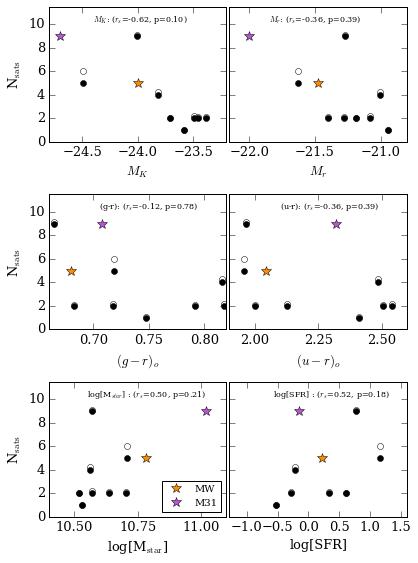

In [24]:
fig = plt.subplots(figsize=(6,8), sharex=True)
plt.rcParams['font.size'] = 13.0

MWsats = 5
M31sats = 9

ns = sats['Ncompl']
np.append(ns,MWsats)

ylim = 11.5
yl = 10.25

# MK
ax = plt.subplot2grid((3,2), (0, 0))
ax.set_ylim(0, ylim)
ax.plot(hosts['M_K'],sats['Nsat'],'ko')
ax.plot(hosts['M_K'],sats['Ncompl'],'ko',markerfacecolor='none')
ax.plot([-24],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([-24.51-0.188],[M31sats],'*',color='#ba55d3',markersize=11) # hammer 2007

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_ylabel('N$_{\mathrm{sats}}$')
ax.set_xlabel('$M_K$')
hp = hosts['M_K']
np.ma.append(hp,-24)
sr = spearmanr(hp,ns)
t = '$M_K$: ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(-24.4,yl,t,fontsize=8)
print sr[1]


# Mr
ax = plt.subplot2grid((3,2), (0, 1))
ax.set_ylim(0, ylim)
ax.set_xlim(-22.15,-20.8)
ax.plot(hosts['M_r'],sats['Nsat'],'ko')
ax.plot(hosts['M_r'],sats['Ncompl'],'ko',markerfacecolor='none')
#ax.plot([-21. + 5.*np.log10(0.7)],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([-20.7 + 5.*np.log10(0.7)],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([-22.0],[M31sats],'*',color='#ba55d3',markersize=11) # hammer 2007

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax.set_xlabel('$M_r$')
ax.get_yaxis().set_ticklabels([])
hp = hosts['M_r']
np.ma.append(hp,-20.7+ 5.*np.log10(0.7))
sr = spearmanr(hp,ns)
#sr = spearmanr(hosts['M_r'],sats['Ncompl'])
t = '$M_r$: ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(-21.85,yl,t,fontsize=8)
print sr[1]


# COLORS
# g-r
gr =  hosts['M_g'] - hosts['M_r']
ax = plt.subplot2grid((3,2), (1, 0))
ax.plot(gr,sats['Nsat'],'ko')
ax.plot(gr,sats['Ncompl'],'ko',markerfacecolor='none')
ax.plot([0.68],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([0.708],[M31sats],'y*',color='#ba55d3',markersize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.set_ylim(0, ylim)
ax.set_xlabel('$(g-r)_o$')
ax.set_ylabel('N$_{\mathrm{sats}}$')
hp = gr
np.ma.append(hp,0.68)
sr = spearmanr(hp,ns)
print sr
sr = spearmanr(gr,sats['Ncompl'])
print sr
print hp
print gr
t = '(g-r): ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(0.705,yl,t,fontsize=8)
print sr[1]


# u-r
ur =  hosts['M_u'] - hosts['M_r']
ax = plt.subplot2grid((3,2), (1, 1))
ax.plot(ur,sats['Nsat'],'ko')
ax.plot(ur,sats['Ncompl'],'ko',markerfacecolor='none')
ax.plot([2.043],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([2.32],[M31sats],'y*',color='#ba55d3',markersize=11)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.set_ylim(0, ylim)
ax.set_xlabel('$(u-r)_o$')
ax.get_yaxis().set_ticklabels([])
hp = ur
np.ma.append(hp,2.043)
sr = spearmanr(hp,ns)
#sr = spearmanr(ur,sats['Ncompl'])
t = '(u-r): ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(2.1,yl,t,fontsize=8)
print sr[1]


# DERIVED PROPERTIES
# MSTAR
# 6.08 +/- 1.14 x 10^10
ax = plt.subplot2grid((3,2), (2, 0))
ax.plot(log_SM,sats['Nsat'],'ko',label='_nolabel_')
ax.plot(log_SM,sats['Ncompl'],'ko',markerfacecolor='none',label='_nolabel_')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.25))
ax.plot([np.log10(6.08e10)],[MWsats],'y*',color='#ff8c00',markersize=11,label='MW')
ax.plot([np.log10(10.5e10)],[M31sats],'y*',color='#ba55d3',markersize=11,label='M31')
ax.set_ylim(0, ylim)
ax.set_xlim(10.4, 11.1)
ax.set_xlabel('log[M$_{\mathrm{star}}$]')
ax.set_ylabel('N$_{\mathrm{sats}}$')
hp = log_SM
np.ma.append(hp,np.log10(6.08e10))
sr = spearmanr(hp,ns)
#sr = spearmanr(log_SM,sats['Ncompl'])
t = 'log[M$_{{star}}$] : ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(10.55,yl,t,fontsize=8)
print sr[1]
ax.legend(fontsize=10,loc=4,numpoints = 1,frameon=True)

# SFR
# 1.65 +/- 0.19 msun/year
ax = plt.subplot2grid((3,2), (2, 1))
ax.plot(sats['logSFR'],sats['Nsat'],'ko')
ax.plot(sats['logSFR'],sats['Ncompl'],'ko',markerfacecolor='none')
ax.set_ylim(0, ylim)
ax.set_xlabel('log[SFR]')
ax.set_xlim(-1.28,1.6)
ax.get_yaxis().set_ticklabels([])
ax.plot([np.log10(1.65)],[MWsats],'y*',color='#ff8c00',markersize=11)
ax.plot([np.log10(0.7)],[M31sats],'y*',color='#ba55d3',markersize=11)
hp = sats['logSFR']
np.ma.append(hp,-1.28)
sr = spearmanr(hp,ns)
#sr = spearmanr(sats['logSFR'],sats['Ncompl'])
t = 'log[SFR] : ($r_s$={:04.2f}, p={:04.2f})'.format(sr[0],sr[1])
ax.text(-0.57,yl,t,fontsize=8)
print sr[1]

plt.tight_layout(w_pad=0)
plt.savefig('fig_nsats.pdf')




There are 9 M31 satellites.
M33 -19.14
M32 -16.73
IC 10 -15.3

NGC 205 -16.78
NGC 147 -14.95
NGC 185 -15.05

And XXXII -12.55
Andromeda II -12.87
Andromeda VII -13.51


Andromeda I  -12.16
And XXXI  -12.0
Andromeda VI  -11.77
